## Goal

We need to find the customer groups that bring us the most and the worst revenue for a retail store. And analyze their behavior to plan marketing activities to improve sales and customer service.

## Metrics and method of analysis

To solve this problem, we perform a cohort analysis with Revenue and ARPU (Average revenue per user) metrics with data from December 1, 2009, to December 9, 2010.

## Cohort Analysis

- Cohort analysis in marketing helps to observe user behavior and track their actions in order to more accurately assess the effectiveness of marketing channels. 

- In cohort analysis, the audience is divided into cohorts - groups of users who took the same action in a given period of time.

- For this analysis, you need to define:
    - The user action that puts him in the cohort. 
    - Cohort size - the period during which the action was performed. 
    - Reporting period - how long you will analyze the cohort. 
    - The key metric is the metric you are analyzing. 

- Then you need to form cohorts, compare them by the desired metric and analyze the results.

### Definition for analysis in this case

<b> Customer action </b>: purchase

<b> Cohort size  </b>: month

<b> Reporting period  </b>: 12 months from 01-12-2009 to 01-12-2010

<b> Key metrics  </b>: Revenue and ARPU (Average revenue per user)

In [1]:
# add libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

In [2]:
# add data
data = pd.read_excel("online_retail_II.xlsx")

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Data Preparation

1. Delete all records with no Customer ID, because it is on the basis of Customer ID we will build cohorts

In [6]:
data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
data = data[data['Customer ID'].notna()].reset_index()

In [8]:
data.isna().sum()

index          0
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

2. Check & Clean Duplicates

In [9]:
data.duplicated().sum()

0

3. Leave only the data from 01-12-2009 to 30.11.2010, because for 12-2010 we have data only for 9 days

In [10]:
revenue = data.query("'2009-12-01' <= InvoiceDate < '2010-12-01'")

In [11]:
revenue.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
revenue.tail()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
402726,502933,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
402727,502934,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
402728,502935,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
402729,502936,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
402730,502937,536364,22415,WHITE TISSUE REAM,10,2010-11-30 19:35:00,7.95,14441.0,United Kingdom


4. Add Revenue column

In [13]:
revenue['Revenue'] = revenue.Quantity * revenue.Price

In [14]:
revenue.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


5. Leave only the columns necessary for analysis

In [15]:
revenue = revenue.drop(['index', 'Invoice', 'StockCode', 'Description', 'Price', 'Country'], axis=1)
revenue.head()

,Quantity,InvoiceDate,Customer ID,Revenue
0,12,2009-12-01 07:45:00,13085.0,83.4
1,12,2009-12-01 07:45:00,13085.0,81.0
2,12,2009-12-01 07:45:00,13085.0,81.0
3,48,2009-12-01 07:45:00,13085.0,100.8
4,24,2009-12-01 07:45:00,13085.0,30.0


In [16]:
# change the data type of the Customer ID column to int
revenue['Customer ID'] = revenue['Customer ID'].astype(int)
revenue.head()

,Quantity,InvoiceDate,Customer ID,Revenue
0,12,2009-12-01 07:45:00,13085,83.4
1,12,2009-12-01 07:45:00,13085,81.0
2,12,2009-12-01 07:45:00,13085,81.0
3,48,2009-12-01 07:45:00,13085,100.8
4,24,2009-12-01 07:45:00,13085,30.0


## Performace of Cohort Analysis

1. Add month of purchase

In [17]:
revenue['Sale_Month'] = revenue['InvoiceDate'].dt.to_period("M")

In [18]:
revenue.head()

,Quantity,InvoiceDate,Customer ID,Revenue,Sale_Month
0,12,2009-12-01 07:45:00,13085,83.4,2009-12
1,12,2009-12-01 07:45:00,13085,81.0,2009-12
2,12,2009-12-01 07:45:00,13085,81.0,2009-12
3,48,2009-12-01 07:45:00,13085,100.8,2009-12
4,24,2009-12-01 07:45:00,13085,30.0,2009-12


2. Add month of cohort

In [19]:
cohorts_month = revenue.groupby('Customer ID')['Sale_Month']
revenue['Cohort_Month'] = cohorts_month.transform('min')
revenue.head()

,Quantity,InvoiceDate,Customer ID,Revenue,Sale_Month,Cohort_Month
0,12,2009-12-01 07:45:00,13085,83.4,2009-12,2009-12
1,12,2009-12-01 07:45:00,13085,81.0,2009-12,2009-12
2,12,2009-12-01 07:45:00,13085,81.0,2009-12,2009-12
3,48,2009-12-01 07:45:00,13085,100.8,2009-12,2009-12
4,24,2009-12-01 07:45:00,13085,30.0,2009-12,2009-12


In [20]:
revenue.tail()

,Quantity,InvoiceDate,Customer ID,Revenue,Sale_Month,Cohort_Month
402726,12,2010-11-30 19:35:00,14441,25.2,2010-11,2010-01
402727,2,2010-11-30 19:35:00,14441,15.9,2010-11,2010-01
402728,12,2010-11-30 19:35:00,14441,15.0,2010-11,2010-01
402729,24,2010-11-30 19:35:00,14441,50.4,2010-11,2010-01
402730,10,2010-11-30 19:35:00,14441,79.5,2010-11,2010-01


In [21]:
revenue.Cohort_Month.nunique()

12

Number of customers in every cohort

In [22]:
cohorts_customers = revenue.groupby('Cohort_Month')['Customer ID'].nunique()
cohorts_customers

Cohort_Month
2009-12    1045
2010-01     394
2010-02     363
2010-03     436
2010-04     291
2010-05     254
2010-06     269
2010-07     183
2010-08     158
2010-09     242
2010-10     379
2010-11     322
Freq: M, Name: Customer ID, dtype: int64

Revenue in every cohort

In [23]:
cohorts_revenue = revenue.groupby(['Cohort_Month', 'Sale_Month'])['Revenue'].sum().reset_index()
cohorts_revenue

,Cohort_Month,Sale_Month,Revenue
0,2009-12,2009-12,663272.050
1,2009-12,2010-01,381102.931
2,2009-12,2010-02,294002.542
3,2009-12,2010-03,386887.810
4,2009-12,2010-04,304759.150
...,...,...,...
73,2010-09,2010-10,19886.720
74,2010-09,2010-11,31002.860
75,2010-10,2010-10,162575.470
76,2010-10,2010-11,40093.080


### Create table for cohort analysis

Indexing the Sale Month for each cohort

In [24]:
lst_month = pd.Series(cohorts_revenue.Sale_Month.unique())
lst_month

0     2009-12
1     2010-01
2     2010-02
3     2010-03
4     2010-04
5     2010-05
6     2010-06
7     2010-07
8     2010-08
9     2010-09
10    2010-10
11    2010-11
dtype: period[M]

In [25]:
lst_cohorts = pd.Series(cohorts_revenue.Cohort_Month.unique())
lst_cohorts

0     2009-12
1     2010-01
2     2010-02
3     2010-03
4     2010-04
5     2010-05
6     2010-06
7     2010-07
8     2010-08
9     2010-09
10    2010-10
11    2010-11
dtype: period[M]

In [26]:
cohorts_revenue['Index_month'] = 0


for i in range (len(lst_cohorts)):
    for j in range(len(lst_month)):
        k = j - i
        for row in range(len(cohorts_revenue)):
            if cohorts_revenue.Cohort_Month[row] == lst_cohorts[i]:
                if cohorts_revenue.Sale_Month[row] == lst_month[j]:
                    if cohorts_revenue['Index_month'][row] == 0:
                        cohorts_revenue['Index_month'][row] = k
    
cohorts_revenue

,Cohort_Month,Sale_Month,Revenue,Index_month
0,2009-12,2009-12,663272.050,0
1,2009-12,2010-01,381102.931,1
2,2009-12,2010-02,294002.542,2
3,2009-12,2010-03,386887.810,3
4,2009-12,2010-04,304759.150,4
...,...,...,...,...
73,2010-09,2010-10,19886.720,1
74,2010-09,2010-11,31002.860,2
75,2010-10,2010-10,162575.470,0
76,2010-10,2010-11,40093.080,1


In [27]:
cohorts_revenue.Index_month.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

### Cohort analysis table

In [28]:
cohorts = cohorts_revenue.pivot(index='Cohort_Month',columns='Sale_Month',values='Revenue').fillna(0)
cohorts

Sale_Month,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11
Cohort_Month,,,,,,,,,,,,
2009-12,663272.05,381102.931,294002.542,386887.810,304759.150,291166.40,308088.98,316264.83,335917.09,372772.330,444619.04,572882.652
2010-01,0.00,150849.971,37494.811,50786.440,55620.521,52352.94,56076.45,43416.91,43044.70,53144.291,73135.60,73246.110
2010-02,0.00,0.000,157902.233,29827.570,49944.260,47854.48,40480.06,36876.03,36667.66,45756.030,50845.93,53182.230
2010-03,0.00,0.000,0.000,168494.661,45621.690,45456.20,51677.48,44478.44,48932.16,58582.090,73205.94,67809.230
2010-04,0.00,0.000,0.000,0.000,104689.401,15934.71,18172.35,25833.01,20573.81,30880.450,31640.15,27326.570
2010-05,0.00,0.000,0.000,0.000,0.000,107159.82,14143.87,13600.01,12711.85,16270.310,30934.20,21972.810
2010-06,0.00,0.000,0.000,0.000,0.000,0.00,82820.72,12068.82,22330.78,24070.710,32141.41,46960.370
2010-07,0.00,0.000,0.000,0.000,0.000,0.00,0.00,70247.85,7638.27,13527.110,23158.84,27604.010
2010-08,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,59440.14,13509.400,22846.48,22895.880


In [29]:
cohort_by_month = cohorts_revenue.pivot(index='Cohort_Month',columns='Index_month',values='Revenue').fillna(0)
cohort_by_month

Index_month,0,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,,
2009-12,663272.050,381102.931,294002.542,386887.810,304759.15,291166.40,308088.98,316264.83,335917.090,372772.33,444619.04,572882.652
2010-01,150849.971,37494.811,50786.440,55620.521,52352.94,56076.45,43416.91,43044.70,53144.291,73135.60,73246.11,0.000
2010-02,157902.233,29827.570,49944.260,47854.480,40480.06,36876.03,36667.66,45756.03,50845.930,53182.23,0.00,0.000
2010-03,168494.661,45621.690,45456.200,51677.480,44478.44,48932.16,58582.09,73205.94,67809.230,0.00,0.00,0.000
2010-04,104689.401,15934.710,18172.350,25833.010,20573.81,30880.45,31640.15,27326.57,0.000,0.00,0.00,0.000
2010-05,107159.820,14143.870,13600.010,12711.850,16270.31,30934.20,21972.81,0.00,0.000,0.00,0.00,0.000
2010-06,82820.720,12068.820,22330.780,24070.710,32141.41,46960.37,0.00,0.00,0.000,0.00,0.00,0.000
2010-07,70247.850,7638.270,13527.110,23158.840,27604.01,0.00,0.00,0.00,0.000,0.00,0.00,0.000
2010-08,59440.140,13509.400,22846.480,22895.880,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000


In [30]:
# add a column with the number of people in each cohort
cohort_by_month.insert(0, 'N_customers', cohorts_customers)
cohort_by_month

Index_month,N_customers,0,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,,,
2009-12,1045,663272.050,381102.931,294002.542,386887.810,304759.15,291166.40,308088.98,316264.83,335917.090,372772.33,444619.04,572882.652
2010-01,394,150849.971,37494.811,50786.440,55620.521,52352.94,56076.45,43416.91,43044.70,53144.291,73135.60,73246.11,0.000
2010-02,363,157902.233,29827.570,49944.260,47854.480,40480.06,36876.03,36667.66,45756.03,50845.930,53182.23,0.00,0.000
2010-03,436,168494.661,45621.690,45456.200,51677.480,44478.44,48932.16,58582.09,73205.94,67809.230,0.00,0.00,0.000
2010-04,291,104689.401,15934.710,18172.350,25833.010,20573.81,30880.45,31640.15,27326.57,0.000,0.00,0.00,0.000
2010-05,254,107159.820,14143.870,13600.010,12711.850,16270.31,30934.20,21972.81,0.00,0.000,0.00,0.00,0.000
2010-06,269,82820.720,12068.820,22330.780,24070.710,32141.41,46960.37,0.00,0.00,0.000,0.00,0.00,0.000
2010-07,183,70247.850,7638.270,13527.110,23158.840,27604.01,0.00,0.00,0.00,0.000,0.00,0.00,0.000
2010-08,158,59440.140,13509.400,22846.480,22895.880,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000


### Revenue Heatmap

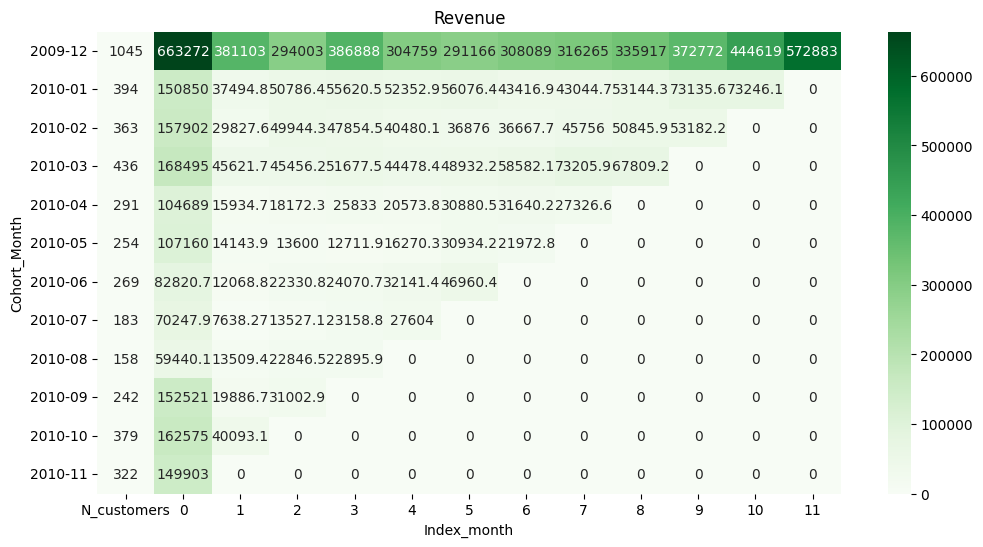

In [31]:
plt.figure(figsize=(12, 6))
plt.title('Revenue')
sns.heatmap(data=cohort_by_month,annot = True,fmt = 'g', cmap = 'Greens')
plt.show()

- We see that the "2009-12 cohort" brings in the highest revenue in all months 
- All cohorts have a noticeable drop in purchasing power the month after the first purchase (Index_month=1)
- Because cohort sizes are different, the Revenue metric doesn't provide an accurate representation of which cohort is most valuable to us, so let's analyze the more relevant ARPU metric, which will show how much revenue one customer in each cohort brings

## ARPU (Average revenue per user)

ARPU = Revenue / N_users  in cohort

In [32]:
# create APRU table
ARPU = pd.DataFrame()

for col in cohort_by_month:
    if col != 'N_customers':
        ARPU[col] = round((cohort_by_month[col]/cohort_by_month['N_customers']), 2)

In [33]:
ARPU.insert(0, 'N_customers', cohort_by_month['N_customers'])

In [34]:
ARPU

,N_customers,0,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,,,
2009-12,1045,634.71,364.69,281.34,370.23,291.64,278.63,294.82,302.65,321.45,356.72,425.47,548.21
2010-01,394,382.87,95.16,128.90,141.17,132.88,142.33,110.20,109.25,134.88,185.62,185.90,0.00
2010-02,363,434.99,82.17,137.59,131.83,111.52,101.59,101.01,126.05,140.07,146.51,0.00,0.00
2010-03,436,386.46,104.64,104.26,118.53,102.01,112.23,134.36,167.90,155.53,0.00,0.00,0.00
2010-04,291,359.76,54.76,62.45,88.77,70.70,106.12,108.73,93.91,0.00,0.00,0.00,0.00
2010-05,254,421.89,55.68,53.54,50.05,64.06,121.79,86.51,0.00,0.00,0.00,0.00,0.00
2010-06,269,307.88,44.87,83.01,89.48,119.48,174.57,0.00,0.00,0.00,0.00,0.00,0.00
2010-07,183,383.87,41.74,73.92,126.55,150.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-08,158,376.20,85.50,144.60,144.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### ARPU Heatmap 

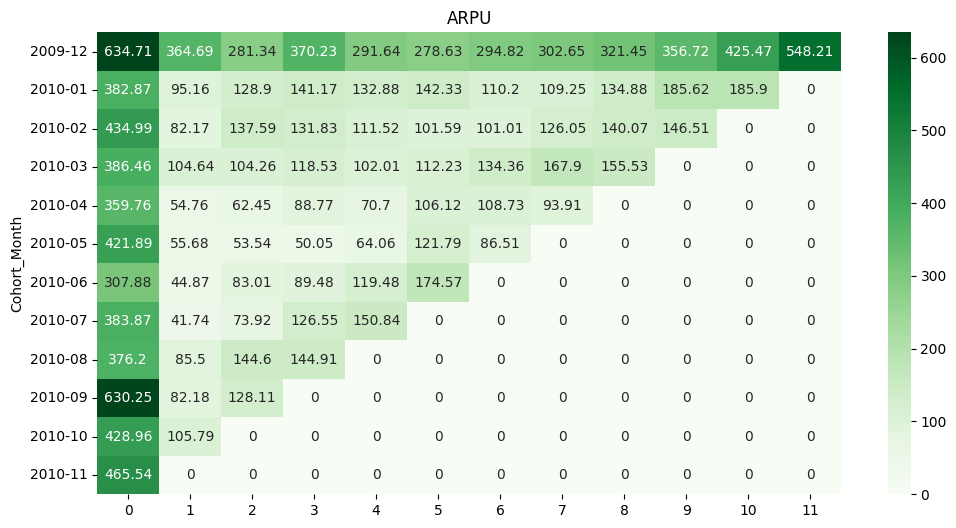

In [35]:
#Build the heatmap
plt.figure(figsize=(12, 6))
plt.title('ARPU')
sns.heatmap(data=ARPU.drop(['N_customers'], axis=1),annot = True,fmt = 'g', cmap = 'Greens')
plt.show()

- the best ARPU for all cohorts is observed in Month_0, i.e. the month of the first purchase


- the leader in ARPU, as well as in Revenue, is "2009-12 cohort" -> but let's not forget that this is affected by the seasonal Christmas/New Year's period. We can use this cohort as a benchmark to analyze "2010-12 cohort". If we pursue the same policy of attracting new clients (same tools and channels), the metrics for "2010-12 cohort" should be as good as "2009-12 cohort"


- in Month_0, besides "2009-12 cohort", the "2010-09 cohort" also took the lead -> it's worth analyzing the products bought during that period, and if there's no seasonal effect, it's worth looking at the channels that were used to attract new customers in 09-2010 to try and apply those practices to attract customers in the following months


- the worst ARPU in Month_0, in "cohort 2010-06" and during the following periods in "2010-05 cohort" -> they can be used as an anti-benchmark for the other periods + it is worth additional marketing incentives for these groups to increase sales in the following months


- it is worth mentioning the seasonal effect of ARPU increase in 10-2010 for all cohorts -> starting from October 2010 there is an increase in buying power which should continue in November 2010

### All Users (ARPU over saletime)

In [36]:
# calculate number of non-null
for_mean = ARPU.astype(bool).sum(axis=0)
for_mean

N_customers    12
0              12
1              11
2              10
3               9
4               8
5               7
6               6
7               5
8               4
9               3
10              2
11              1
dtype: int64

In [37]:
# create table of mean ARPU for all cohort
ARPU_mean = pd.DataFrame(index = [0])

for col in list(for_mean.index):
    if col != 'N_customers':
        ARPU_mean [col] = round((ARPU[col].sum()/ for_mean[col]), 2)     
    else:
        ARPU_mean [col] = (ARPU[col].sum())
ARPU_mean

,N_customers,0,1,2,3,4,5,6,7,8,9,10,11
0,4336,434.45,101.56,119.77,140.17,130.39,148.18,139.27,159.95,187.98,229.62,305.68,548.21


- Out of all of the new customers during this time range (4336 customers)
- The best ARPU for this period was on Month 11 = 548.21, but it is only on the basis of one cohort and cannot be used as a relevant
- The best ARPU for this period with base in all cohorts on Month 0 = 434.45 USD per customer  (mean for all cohorts)
- The worst ARPU was on Month 1 = 101.56

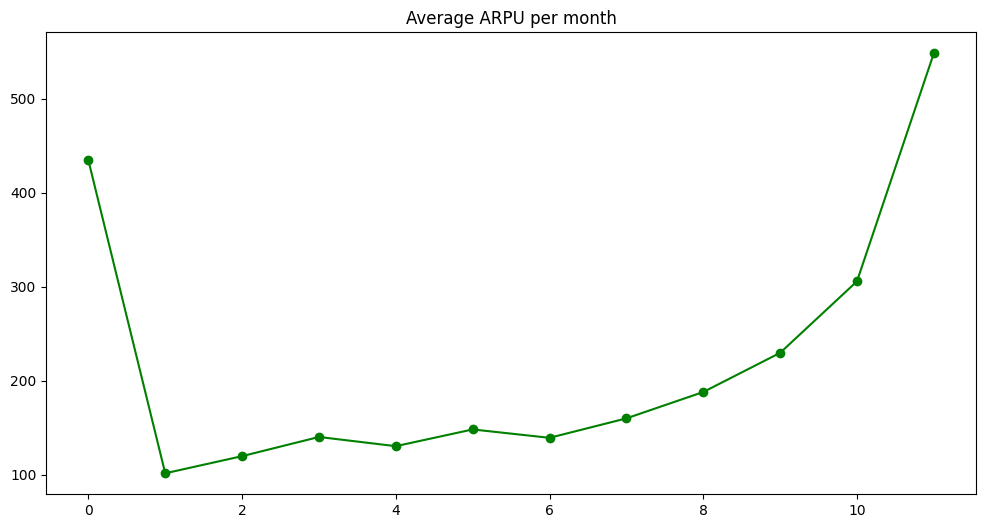

In [38]:
# Build the plot
plt.figure(figsize=(12, 6))
plt.title ('Average ARPU per month')
plt.plot(ARPU_mean.drop(['N_customers'], axis=1).T, marker="o", c="g")
#sns.lineplot (ARPU_mean.drop(['N_customers'], axis=1).T, markers=True)
plt.show()

- For all cohorts, the next month after the first sale (Month_1) has the lowest ARPU for the entire subsequent period of purchases -> it is worth adding a marketing tool to increase ARPU in the 1 month after their first purchase, such as an email newsletter with discounts, recommendations or give the customer a personal discount.

## Conclusion

- We found the more valuable customer groups that bring us the most revenue in total and per customer - it's "2009-12 cohort"
    - The high performance in Month_0 is most likely due to the Christmas/New Year's sales period, but the high ARPU in the following months suggests that the audience that came to us in this period is of very high quality, and with a constant high level of purchasing power. That's why we need to focus on these tools and actions to attract new customers
    - We can use this cohort as a benchmark for other cohorts, which we will receive in December each year
    - Continue to monitor this group, and if there is a decrease in APRU for several months, additional marketing efforts should be made for buyers from this cohort
    
- We also found another leader in Month_0 -> the "2010-09 cohort":
    - It's worth analyzing the products bought during that period, and if there's no seasonal effect, it's worth looking at the channels that were used to attract new customers in 09-2010 to try and apply those practices to attract customers in the following months
    
- the worst ARPU in "cohort 2010-06" and "2010-05 cohort"
    - They can be used as an anti-benchmark for the other periods
    - It is worth additional marketing incentives for these cohorts to increase sales in the following months
    
- For all future cohorts, we need to improve the number of sales in the next month after the first sale (Month_1) 
    - All old cohorts have the lowest ARPU Month_1 compared to the following months 
    - It is worth adding a marketing tool to increase ARPU in the first month after the first purchase, such as an email newsletter with discounts, recommendations, or giving the customer a personal discount.